In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from datetime import datetime
from netCDF4 import Dataset,num2date
from cartopy.util import add_cyclic_point

In [37]:
#============================================================================
# You will load the precip data file using the netCDF4 module.
# The time dimension for each file is monthly. That means the
# first time element is January 1979, the second is February 1979, etc.
# all the way to December 2019.
# The dimensions of the variable temperature are:
# time x latitude x longitude.
#============================================================================
precipFile = 'precip.mon.mean.nc' # The file to open

#============================================================================
# Load the variables you need. Type 'nc.variables' into the Python
# command line to see what the names of the variables are and their
# dimensions (nc is the 'file handler' for the netCDF file you open).
# An example is below.
#============================================================================
nc = Dataset(precipFile,'r') # Opens the netCDF file
longitude = nc.variables['lon'][:] # Reads in all longitudes into an array.
latitude = nc.variables['lat'][:] # Read in all latitude points.
precip = nc.variables['precip'][:]
#precip1 = nc.variables['precip'][:,:,:] # This will be a 3-D array of all monthly precipitation rates.

print(list(nc.variables))

# Convert missing values to NaN for computations.
precip = np.where(precip.mask,np.nan,precip.data)

# precip[0,:,:] will be the global precipitation rate for January 1979.

units = nc.variables['precip'].units # Get the units of the variable.

#============================================================================
# Load in the time variable and also some associated time
# properties to get the dates.
#============================================================================
time = nc.variables['time'][:] # Read in the times (which in this case is years).
timeUnits = nc.variables['time'].units
dates = num2date(time,timeUnits,calendar='standard')
years = np.array([d.year for d in dates])
months = np.array([d.month for d in dates])

nc.close() # closes the netCDF file.

total_years = np.unique(years)

print(total_years)
print(len(total_years))

['lon', 'lat', 'time', 'precip']
[1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022]
44


In [32]:
print(type(precip))
print(precip.shape)
#print(precip[0,:,:])
#print(years)

<class 'numpy.ndarray'>
(528, 94, 192)


In [64]:
#============================================================================
# Calculate the ANNUAL-AVERAGE precipitation at each grid point.
# You can loop through the years (1979 to 2022), find (using np.where)
# where in the array the data for that particular year is (using the years array),
# and then average all the values for that year and store it in a new array.
# Use np.nanmean for averaging (in case of missing data).

# Remember, you can declare empty arrays to fill using the np.zeros() or np.ones()
# functions.
#============================================================================
annualAverage = np.empty((len(np.unique(years)), len(latitude), len(longitude)))

len_years = len(np.unique(years))
len_lats = len(latitude)
len_lons = len(longitude)
yearly_indices = []

#for i in range(len_years):
#    yearly = np.where(years == np.unique(years)[i])[0]
#    for j in range(len_lats): 
#        for k in range(len_lons): 
#            annualAverage[yearly, j, k] = np.nanmean(precip[yearly, j, k])

for year in range (len_years):
    year_loop = np.where(years == total_years[year])[0]
    for i in range(len_lats):
        for j in range(len_lons):
            annualAverage[year, i, j] = np.nanmean(precip[year_loop, i, j])

#============================================================================
# Calculate the average over all years (Dimension 0 in annualAverage) to make
# the spatial map (the first plot). Again, use np.nanmean in case of missing data.
#============================================================================
climoPrecip = np.nanmean(annualAverage,axis=0) # This will be dimensions lat x lon.
# DJFT_zonalMean = np.nanmean(DJFT,axis=3)

#============================================================================
# Calculate the GLOBAL AREA-AVERAGED precipitation for each year.
# (1) First, average over all longitudes (see HW #1). Put the result
# into zonalMeanPrecip.
#============================================================================
zonalMeanPrecip = np.nanmean(precip,axis=2)
#print(precip.shape)

C:\Users\Tony\AppData\Local\Temp/ipykernel_17296/2215444765.py:28: RuntimeWarning: Mean of empty slice
  annualAverage[year, i, j] = np.nanmean(precip[year_loop, i, j])


In [65]:
print(annualAverage)

[[[0.47195898 0.46448933 0.45719338 ... 0.49679993 0.48869333 0.47994978]
  [0.38539203 0.37242147 0.36014575 ... 0.43906933 0.42019253 0.40177896]
  [0.68365715 0.7017812  0.72390065 ... 0.65180978 0.65806345 0.66761766]
  ...
  [0.03489723 0.06877125 0.13489798 ... 0.00994047 0.01254616 0.01932097]
  [0.01243035 0.01364634 0.015673   ... 0.00982466 0.01028789 0.01115646]
  [0.06222806 0.064081   0.06616556 ... 0.05817476 0.05962237 0.06054884]]

 [[0.36773122 0.3607827  0.35354466 ... 0.39407768 0.38377071 0.37716962]
  [0.25348601 0.24676911 0.24039963 ... 0.28608614 0.27357881 0.26321393]
  [0.60195417 0.62048355 0.64237138 ... 0.55846803 0.57172811 0.58585677]
  ...
  [0.04045604 0.07722528 0.15279041 ... 0.01063532 0.01410958 0.02204247]
  [0.02933841 0.03472351 0.04178784 ... 0.01885773 0.02169504 0.02545882]
  [0.10640905 0.11046236 0.11619488 ... 0.09714436 0.09946054 0.10189252]]

 [[0.55603605 0.5486822  0.54231272 ... 0.58006634 0.57091745 0.5635057 ]
  [0.55528329 0.544744

In [66]:
print(climoPrecip)

[[0.49754874 0.4907213  0.48459923 ... 0.52013274 0.51218011 0.50475914]
 [0.39914826 0.38832936 0.37958844 ... 0.44054458 0.42490252 0.41106339]
 [0.64511657 0.66632271 0.69100705 ... 0.60361365 0.61394562 0.62824009]
 ...
 [0.05075906 0.10824357 0.22042396 ... 0.00946236 0.01369867 0.02464603]
 [0.01979128 0.02497097 0.03205992 ... 0.01154425 0.01338552 0.01593281]
 [0.11547371 0.11997182 0.12524112 ... 0.10519964 0.10805143 0.11151385]]


In [67]:
print(zonalMeanPrecip)

[[0.34798223 0.22020551 0.30476752 ... 0.54968467 0.33626384 0.16682859]
 [0.21152348 0.10832713 0.17927801 ... 0.38627869 0.199863   0.13861471]
 [0.32528736 0.15764351 0.20243612 ... 0.73355981 0.25076089 0.10926808]
 ...
 [0.33215264 0.35839777 0.56020878 ... 0.49166454 0.32203024 0.10586258]
 [0.30446714 0.30349724 0.36168022 ... 0.71751308 0.42496239 0.19555998]
 [0.7263073  0.45419322 0.64252338 ... 1.2094247  0.7741254  0.25793017]]


In [ ]:
#============================================================================
# (2) Next, do a WEIGHTED AVERAGE over all latitudes for each year. Remember,
# a weighted average is:
#     avg = sum(x_i*w_i) / sum(w_i) for all i (i.e., all latitude points)
#     For latitude, w_i= cosine(lat_i). See the weights array below.

# Store the answer in the variable globalAvgPrecip.
#============================================================================
weights = np.cos(np.radians(latitude)) # The weights for the weighted average
sumWeights = np.sum(weights) # The denominator for the averaging.

globalAvgPrecip = ? # Will have dimensions of time - one value per year.


#============================================================================
# Now, average globalAvgPrecip over all years to get the global climatological
# precipitation rate (one single number).
#============================================================================
climoGlobalPrecip = ?

print('The average global precipitation rate is {:2.3} mm/day.'.format(climoGlobalPrecip))

In [26]:
print(annualAverage)

[[0.49754874 0.4907213  0.48459923 ... 0.52013274 0.51218011 0.50475914]
 [0.39914826 0.38832936 0.37958844 ... 0.44054458 0.42490252 0.41106339]
 [0.64511657 0.66632271 0.69100705 ... 0.60361365 0.61394562 0.62824009]
 ...
 [0.05075906 0.10824357 0.22042396 ... 0.00951032 0.01360216 0.0245178 ]
 [0.01978221 0.02499294 0.03206673 ... 0.01162207 0.01340034 0.01594515]
 [0.11547371 0.11997182 0.12524112 ... 0.10519964 0.10805143 0.11151385]]


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (528,) and arg 1 with shape (94, 192).

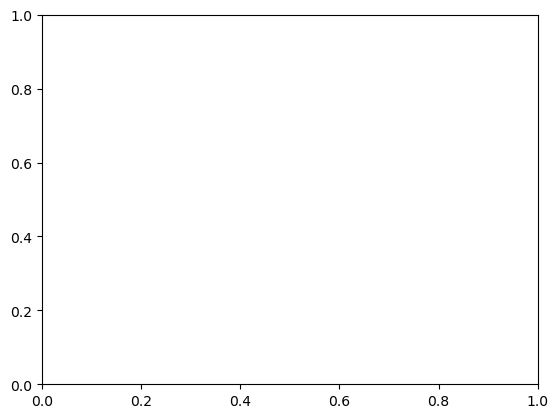

In [27]:
# Plot the bar plot 
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)

plt.bar(years,annualAverage,label="Bars 1",color="black")
plt.xlabel('Rainfall Rate (mm/day)')
plt.ylabel('Year')
plt.title('Global Annual-Average Rainfall Rate')

In [ ]:
#============================================================================
# Plot the spatial climo map. The variable you will be plotting is called
# plotClimoPrecip (see below). Use on a Robinson projection.
# Choose an appropriate colorbar for your precipitation. Lots of choices!
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# Some details on cartopy projections.
# https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

# A short tutorial on plotting with cartopy from Dr. Pegion.
# https://kpegion.github.io/Pangeo-at-AOES/examples/cartopy-tutorial.html
#============================================================================

#============================================================================
# Use these limits and contour intervals for your plot.
#============================================================================
cmin = 0.
cmax = 8.1
cint = 0.5
clevs = np.round(np.arange(cmin,cmax,cint),1)


#============================================================================
# Choose your own colormap for the shaded contours.
#============================================================================
cmap = ?


#============================================================================
# Use this code to fill in the data gap at the Prime Meridian.
# The variable you will be contouring is plotClimoPrecip.
# See https://kpegion.github.io/Pangeo-at-AOES/examples/cartopy-tutorial.html
# for more information.
#============================================================================
plotClimoPrecip,longitude2 = add_cyclic_point(climoPrecip,longitude)


#============================================================================
# Use plotLon and plotLat as your variables when making your map.
#============================================================================
plotLon,plotLat = np.meshgrid(longitude2,latitude)


#============================================================================
# Code to set up the map, including the projection and adding "features"
# to the map (e.g., coastlines and country borders).
#============================================================================
projection = ccrs.Robinson(central_longitude=180)
data_crs = ccrs.PlateCarree()

plt.figure(figsize=(12,8))
ax = plt.subplot(111, projection=projection)
ax.add_feature(cfeature.COASTLINE,linewidth=1)
ax.add_feature(cfeature.BORDERS,linewidth=0.5)


#============================================================================
# Write code here to do filled contours of plotClimoPrecip. Use plotLon and
# plotLat as your plotting variables. Make sure to add a colorbar with units.
# Be sure to include the keyword 'transform=data_crs'.
#============================================================================
cs = ax.contourf(?,transform=data_crs)


#============================================================================
# Add an appropriate title to your plot and save it.
#============================================================================
plt.title(????) # See homework for what should be in the title.
plt.show()
plt.savefig('YOURFILENAMEWITHFULLPATH.png',dpi=400)


#============================================================================
# The second plot is a bar plot of global-average precipitation
# as a function of year). The variable you are plotting is globalAvgPrecip.
# Be sure to label each axis appropriately and also add an informative title.
#============================================================================
taxis = np.arange(1979,2023)

plt.figure()
?
?
?

plt.title(???)
plt.xlabel(???)
plt.ylabel(???)

plt.show()
#plt.savefig('YOURFILENAMEWITHFULLPATH.png',dpi=400)
